# **California Housing Price 1990**


There are various steps involve in the analysis of data and performing prediction.


1.   Data Import
2.   Exploratory data analysis
3.   Feature Engineering
4.   Machine Learning models
5.   Comparison
*Note: Some parts are commented , due to hardware and time constraints I was't able to run those cells. 

In [1]:
# The notebook was 
from google.colab import drive
drive.mount('/content/drive')

#Various Python Packages useful for the analysis
import seaborn as sns # Visualization of data attributes
import fancyimpute # Perform data impute
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv).
import os # Input data files.
from matplotlib import pyplot as plt # graph generation
from sklearn.model_selection import train_test_split # Split the dataset in training and testing based on the ratio.
from sklearn.preprocessing import MinMaxScaler # Normalization on training dataset.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # RF for find the feature importance.
from sklearn.ensemble import RandomForestRegressor # Prediction Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
import time
import warnings
warnings.filterwarnings("ignore")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


# 1. Data Import

In [2]:

def dataset_path():
    #provide the path of directory where CSV is present.
    for dirname, _, filenames in os.walk(r'/content/drive/My Drive/LensingMediaAssignment/'):
        for filename in filenames:
            if(filename == "housing.csv"):
                dataset_path = os.path.join(dirname, filename)
    return dataset_path

def load_housing_data(dataset_path):
    return pd.read_csv(dataset_path)

housing_data_path = dataset_path()
housing = load_housing_data(housing_data_path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


Before we perform further operations on data. It is always advisable to perform Exploratory Data Analysis. This helps in knowing each attributes and based on it, we would clean the dataset and further feature engineering.

# 2. Exploratory Data Analysis

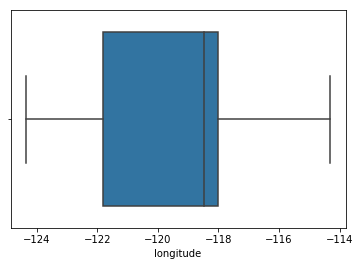

In [3]:
# Understanding the Geolocation
sns.boxplot(x=housing['longitude'])

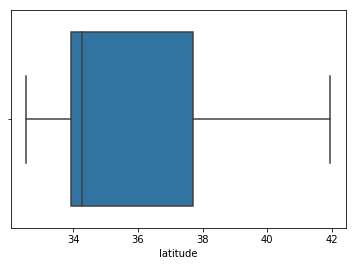

In [4]:
sns.boxplot(x=housing['latitude'])

The boxplot shows that the geolocation are not scattered much. 
The laltitude is between 33 and 38, where longitude lies between -122 and -118.

Outcome:
As data is of california, it make sense that the geolocation are nearby.

## 2.1 Analyzing Numerical Attributes

### Correlation of various attributes

In [5]:
# Used heat map of correlation or we could have used scatter plot of various attributes.
corr = housing.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1,-0.924664,-0.108197,0.044568,0.069608,0.0997732,0.0553101,-0.0151759,-0.0459666
latitude,-0.924664,1,0.0111727,-0.0360996,-0.0669828,-0.108785,-0.0710354,-0.0798091,-0.14416
housing_median_age,-0.108197,0.0111727,1,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.0360996,-0.361262,1,0.93038,0.857126,0.918484,0.19805,0.134153
total_bedrooms,0.069608,-0.0669828,-0.320451,0.93038,1,0.877747,0.979728,-0.00772285,0.0496862
population,0.0997732,-0.108785,-0.296244,0.857126,0.877747,1,0.907222,0.00483435,-0.0246497
households,0.0553101,-0.0710354,-0.302916,0.918484,0.979728,0.907222,1,0.0130331,0.0658427
median_income,-0.0151759,-0.0798091,-0.119034,0.19805,-0.00772285,0.00483435,0.0130331,1,0.688075
median_house_value,-0.0459666,-0.14416,0.105623,0.134153,0.0496862,-0.0246497,0.0658427,0.688075,1


Understanding the **Target Variable**

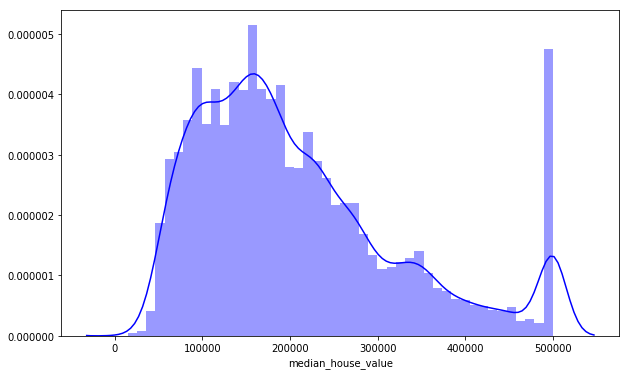

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(housing['median_house_value'],color='blue')
plt.show()

**Observation:**  There could be outliers as high peak value around 50000$. 

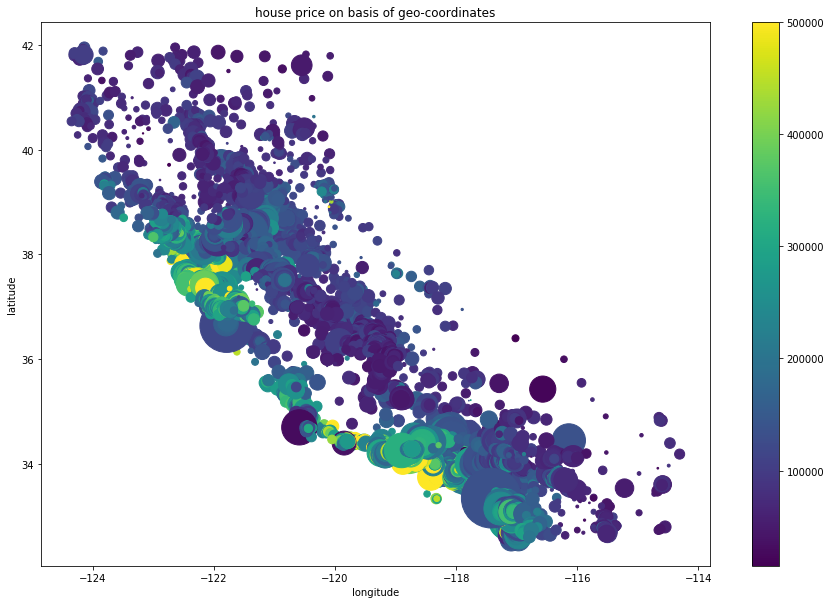

In [7]:
# Hypothesis: The houses near ocean are costly than inland houses

plt.figure(figsize=(15,10))
plt.scatter(housing['longitude'],housing['latitude'],c=housing['median_house_value'],s=housing['population']/10,cmap='viridis')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('house price on basis of geo-coordinates')
plt.show()

The graph shows the slight realtion of cost of houses with the location. For further investigation, we could perform analysis on **'ocean_proximity'** attribute. 


## 2.2 Analyzing Categorical Attribute: Ocean Proximity

[]

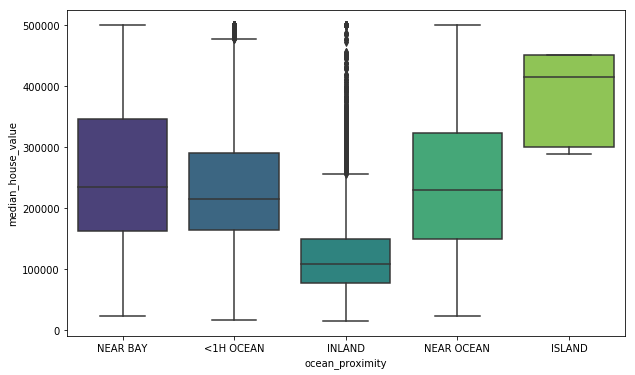

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=housing,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()

The above graph shows the certain variation in 'Island' category, which hols the costly houses. 

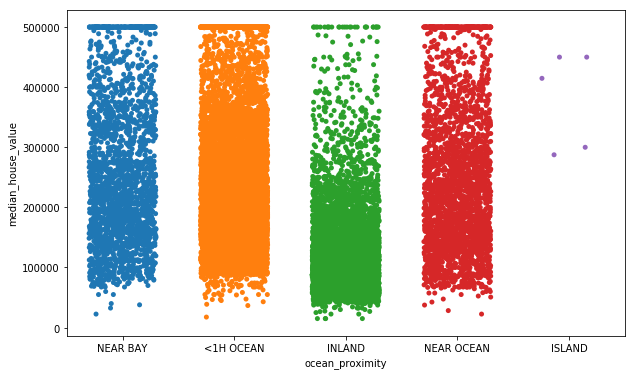

In [9]:
plt.figure(figsize=(10,6))

sns.stripplot(data=housing,x='ocean_proximity',y='median_house_value',jitter=0.3)

The above graph shows the datapoints of various categories of 'Ocean_proximity' attribute. Even though, the 'island' category show interesting variation in housing prices, but they are significantly less to comment about it. Therefore, it would not be useful in further analysis.

## 2.3 Data Cleaning

In [10]:
#info() method is useful to get a quick description of the data, in particular the
#total number of rows, and each attribute’s type and number of non-null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


**Observation:**
* Data type of each attribute ( except Ocean proximity) is float64
* Only 'Total Bed Rooms' has missing values i.e. 207. It is significantly less than the size of dataset.

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Describe function helps to understand the dataset w.r.t range.
Sometimes, just by seeing 'min' value, we can find out that about missing values. For example, if we get total_rooms either 0 or less than zero and there is high chance of missing or junk values.
**In our case, this methods does not provide any information about missing values**

In [12]:
print("\n*** Calculate the total Zero Values *** : ")
print((housing.iloc[1:,]==0).sum())
print("\n*** Calculate the total NaN Values *** : ")
print(housing.isnull().sum())


*** Calculate the total Zero Values *** : 
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

*** Calculate the total NaN Values *** : 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Sometime the missing value can be in form of 0. However, in our dataset, **There is no value equivalent to zero.**
Another way of finding missing value is looking for Na value.
In python, the missing values are marked as NaN. The pandas operator like NaN ignores the NaN values.

**The dataset has only 1% of the missing data.** It may not be necessary to impute the missing values. However, for the learning purpose, we analyse the data impute techniques.

### 2.3.1 Handling Missing Data 

Replace the missing value by : 
* Mean/Median/Mode
* Random between some range
* Value estimation from other predictive model

**If the dataset has large number of missing value, then we can use more advance techniques like Multivariante Imputation (MICE) and Datawig (Deep Learning Based approach)**

In [13]:
corr = housing.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1,-0.924664,-0.108197,0.044568,0.069608,0.0997732,0.0553101,-0.0151759,-0.0459666
latitude,-0.924664,1,0.0111727,-0.0360996,-0.0669828,-0.108785,-0.0710354,-0.0798091,-0.14416
housing_median_age,-0.108197,0.0111727,1,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.0360996,-0.361262,1,0.93038,0.857126,0.918484,0.19805,0.134153
total_bedrooms,0.069608,-0.0669828,-0.320451,0.93038,1,0.877747,0.979728,-0.00772285,0.0496862
population,0.0997732,-0.108785,-0.296244,0.857126,0.877747,1,0.907222,0.00483435,-0.0246497
households,0.0553101,-0.0710354,-0.302916,0.918484,0.979728,0.907222,1,0.0130331,0.0658427
median_income,-0.0151759,-0.0798091,-0.119034,0.19805,-0.00772285,0.00483435,0.0130331,1,0.688075
median_house_value,-0.0459666,-0.14416,0.105623,0.134153,0.0496862,-0.0246497,0.0658427,0.688075,1


The correlation graph shows that the 'total_bedrooms' has high realtion with households. 
Therefore, we could use the 'household' feature to sort the 'total_bedrooms' features.
Lets test the 'total_bedrooms' attribute.

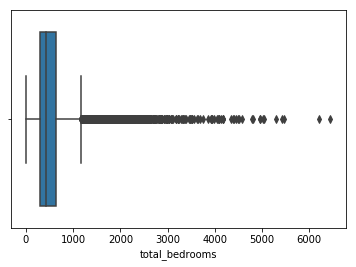

In [14]:
sns.boxplot(x=housing['total_bedrooms'])

**The 'total_bedrooms' attribute has large number of outliers/variations.**
Therefore, it may not be good to use mean or even the 1st method of data impute. Theefore, we will use the IterativeImpute method which works on **MICE algorithm.**

In [15]:
# We used MICE implementation in form of IteratieImputer which internally call algorithm like K-Mean in iterative manner.
housing.head()
print(housing.isnull().sum())
drop_survived = housing.drop(["ocean_proximity"],axis=1)
column_titles = list(drop_survived)
mice_results = fancyimpute.IterativeImputer().fit_transform(drop_survived)
results = pd.DataFrame(mice_results, columns=column_titles)
results['ocean_proximity'] = list(housing['ocean_proximity'])
print("\n After Imputation using MICE algorithm : \n")
print(results.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

 After Imputation using MICE algorithm : 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# 3 Feature Engineering

## 3.1 Feature Addition

Based on our understanding in previous step, we can derive new feature that make more sense and support our hypothesis.
**Hypothesis: The price of the house depends on the number of bedrooms, total rooms, and house age of block (housing_median_age).** 

In [0]:
results["rooms_per_household"] = results["total_rooms"] / results["households"]
results["bedrooms_per_househol"] = results["total_bedrooms"] / results["total_rooms"]
results["people_living_per_household"] = results["population"] / results["households"]

### Data Split

In [0]:
x=results.drop('median_house_value',axis=1)
x=x.drop(['ocean_proximity','total_bedrooms','total_rooms','households','population'],axis=1)
y=results['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

## 3.2 Feature Importance

We would use random forest and check importance of various features.

In [18]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
importances = model.feature_importances_
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(x_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.16084936433662003, 'median_income'), (0.15301356354344725, 'people_living_per_household'), (0.14665472277998015, 'bedrooms_per_househol'), (0.14629069932850292, 'rooms_per_household'), (0.13687787687895545, 'latitude'), (0.1362853354317571, 'longitude'), (0.1200284377007371, 'housing_median_age')]


The array shows the importance value of each features.

**Observation:** 
* Out of 3 newly introduced feature, only 1 feature has good feature importance value.
* The feature like 'ocean_proximity','total_bedrooms','total_rooms','households', and 'population' are not contributing. Therefore , it is safe to drop these attributes. 

# 4. Machine Learning Models

### Data Review

In [19]:
x_train.shape

(15480, 7)

In [20]:
x_train.head()

,longitude,latitude,housing_median_age,median_income,rooms_per_household,bedrooms_per_househol,people_living_per_household
19226,-122.68,38.46,19.0,7.3003,7.961600,0.142886,3.081600
14549,-117.24,32.95,18.0,5.9547,6.547325,0.168448,2.251029
9093,-118.27,34.68,19.0,3.2125,5.207547,0.233696,2.962264
12213,-117.18,33.51,13.0,6.9930,6.428571,0.155556,2.857143
12765,-121.41,38.62,21.0,2.5162,4.429348,0.234049,2.357337


## 4.1 Random Forest Regressor

In [21]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9602437265013724

In [22]:
#Accuracy on Test Data
rfr_output = rfr.predict(x_test)
rfr.score(x_test,y_test)

0.7743120437493543

In [0]:

# # calculate the fpr and tpr for all thresholds of the classification
# def plot_roc_curve(y_test, preds):
#     fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
#     roc_auc = metrics.auc(fpr, tpr)
#     plt.title('Receiver Operating Characteristic')
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#     plt.legend(loc = 'lower right')
#     plt.plot([0, 1], [0, 1],'r--')
#     plt.xlim([-0.01, 1.01])
#     plt.ylim([-0.01, 1.01])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()

# def fit_ml_algo(algo, X_train, y_train, X_test, cv):
#     # One Pass
#     model = algo.fit(X_train, y_train)
#     test_pred = model.predict(X_test)
#     if (isinstance(algo, (LogisticRegression, 
#                           KNeighborsClassifier, 
#                           GaussianNB, 
#                           DecisionTreeClassifier, 
#                           RandomForestClassifier,
#                           GradientBoostingClassifier))):
#         probs = model.predict_proba(X_test)[:,1]
#     else:
#         probs = "Not Available"
#     acc = round(model.score(X_test, y_test) * 100, 2) 
#     # CV 
#     train_pred = model_selection.cross_val_predict(algo, 
#                                                   X_train, 
#                                                   y_train, 
#                                                   cv=cv, 
#                                                   n_jobs = -1)
#     acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
#     return train_pred, test_pred, acc, acc_cv, probs

In [0]:
# # Logistic Regression - Random Search for Hyperparameters

# # Utility function to report best scores
# def report(results, n_top=5):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                   results['mean_test_score'][candidate],
#                   results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")
            
# # Specify parameters and distributions to sample from
# param_dist = {'penalty': ['l2', 'l1'], 
#                          'class_weight': [None, 'balanced'],
#                          'C': np.logspace(-20, 20, 10000), 
#                          'intercept_scaling': np.logspace(-20, 20, 10000)}

# # Run Randomized Search
# n_iter_search = 2
# lrc = LogisticRegression()
# random_search = GridSearchCV(lrc, 
#                                    n_jobs=-1, 
#                                    param_grid=param_dist)

# start = time.time()
# random_search.fit(x_train, y_train)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time.time() - start), n_iter_search))
# report(random_search.cv_results_)

In [0]:
# # Logistic Regression
# start_time = time.time()
# train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
#                                                                  X_train, 
#                                                                  y_train, 
#                                                                  X_test, 
#                                                                  10)
# log_time = (time.time() - start_time)
# print("Accuracy: %s" % acc_log)
# print("Accuracy CV 10-Fold: %s" % acc_cv_log)
# print("Running Time: %s" % datetime.timedelta(seconds=log_time))

In [0]:
# print metrics.classification_report(y_train, train_pred_log)
# print metrics.classification_report(y_test, test_pred_log)

In [0]:

#plot_roc_curve(y_test, probs_log)

Gradient Boosting Trees

In [0]:
# start_time = time.time()
# train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
#                                                                  x_train, 
#                                                                  y_train, 
#                                                                  x_test, 
#                                                                  5)
# gbt_time = (time.time() - start_time)
# print("Accuracy: %s" % acc_gbt)
# print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
# print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

In [29]:

regGra = ensemble.GradientBoostingRegressor(n_estimators=400,max_depth=5,min_samples_split=2,learning_rate=0.1,loss='ls')
regGra.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
predictionTestSet = model.predict(x_test)
regGra.score(x_test,y_test)

0.8410861547838704

Summary: ML models
1. RandomForestRegressor: acc = 77%
2. GradientBoostingRegressor: acc = 84%